## Batonova Oksana

This is the first homework in Advanced Image Processing for master students who attends the class in the spring semester of 2023.

There are *three images* of coins in this folder. The coins are hungarian forints with values 5, 10 and 20. The size of them are increasing in this order. The task is to make distinction between them based on their *size*. You should write a script that outputs an *image with a binary mask* showing only the type of coin chosen for that run.
You can work with any of the pictures, but I recommend starting with '**coin_1_1000x750.jpg**'. You can practice with the other two images. Coin_2 seems challenging because of the uneven background. **The requirement of completion is just coin_1**.

Use case for better understanding: I want to see the 5Ft coins on the image. The output of the program should be an image with a black background only showing the three smallest coins in grayscale/RGB.

In [2]:
# please write comments in your cells so I can follow your thinking/workflow
# for example:

# I am loading the RGB image and converting it to grayscale
img = Image.open('example.png').convert('L')

# calculating the size of the object by counting the white pixels.. etc.
np.sum(binary_image)

# coin_1_1000x750.jpg

In [1]:
# importing libs
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
from scipy.ndimage import measurements
import skimage.morphology as morphology

# loading the RGB image
coin1_rgb = Image.open('coin_1_1000x750.jpg')
# converting it to grayscale
coin1_g = np.array(coin1_rgb.convert('L'))

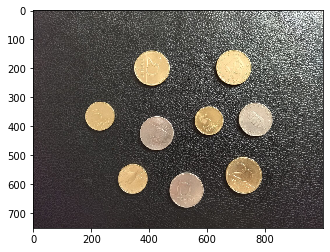

In [2]:
# show the RGB image
plt.imshow(coin1_rgb)

(array([9.0000e+00, 2.1000e+01, 3.5000e+01, 1.1100e+02, 1.4200e+02,
        4.0500e+02, 5.0200e+02, 1.1730e+03, 1.2700e+03, 2.9170e+03,
        4.8250e+03, 4.7370e+03, 1.0615e+04, 1.0885e+04, 2.5217e+04,
        2.3415e+04, 4.3353e+04, 3.0840e+04, 4.4539e+04, 2.8506e+04,
        4.1189e+04, 3.9621e+04, 2.5020e+04, 3.3901e+04, 1.9586e+04,
        2.5795e+04, 1.4900e+04, 1.9787e+04, 1.1561e+04, 1.5399e+04,
        1.3715e+04, 8.3500e+03, 1.1427e+04, 6.8350e+03, 9.6150e+03,
        5.6970e+03, 8.0610e+03, 5.1120e+03, 7.0810e+03, 4.4480e+03,
        6.2580e+03, 5.6540e+03, 3.4650e+03, 5.0230e+03, 3.1590e+03,
        4.5140e+03, 2.9710e+03, 4.0730e+03, 2.5990e+03, 3.8410e+03,
        3.7850e+03, 2.4840e+03, 3.7210e+03, 2.4840e+03, 3.7020e+03,
        2.5310e+03, 3.9240e+03, 2.6360e+03, 4.3250e+03, 3.1500e+03,
        4.8050e+03, 4.6410e+03, 2.9880e+03, 4.5890e+03, 3.1100e+03,
        4.7010e+03, 2.9610e+03, 4.3360e+03, 2.9700e+03, 4.3450e+03,
        5.0360e+03, 3.8870e+03, 6.1930e+03, 3.60

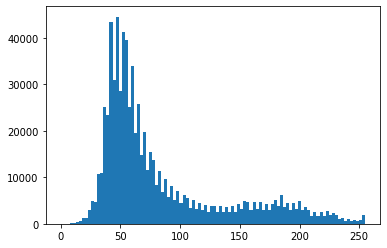

In [3]:
# checking out the histogram of the image, unique values of the image
# choosing a proper threshold (120)
# it's better to use the green intensities of the image
coin1_green = np.array(coin1_rgb)[:,:,1]
plt.hist(coin1_green.ravel(), 100)

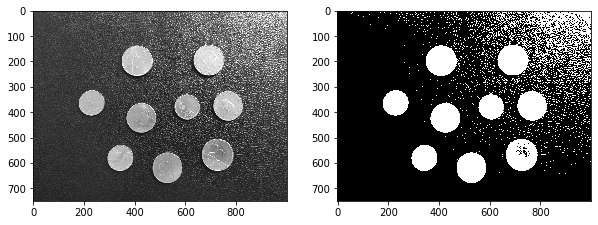

In [4]:
# getting back the image with removing the leftower parts
coin1_bb = coin1_green > 120
# showing the binary image and the grayscale image 
fig, axes = plt.subplots(1, 2, figsize=np.array([10, 10]))
axes[0].imshow(coin1_green, 'gray')
axes[1].imshow(coin1_bb, 'gray')

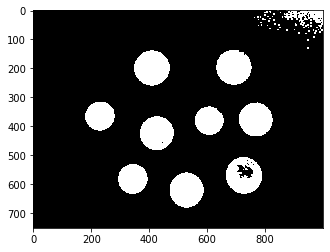

In [5]:
# creating structuring element
s_elem = np.ones([5, 5])
# remove small bright spots by creating the opened image
coin1_bb_opened = morphology.binary_opening(coin1_bb, footprint = s_elem)
s_elem = morphology.disk(15)
# remove small dark spots by creating the closed image
coin1_bb_o_closed = morphology.binary_closing(coin1_bb_opened, footprint = s_elem)
# show the opened image
plt.imshow(coin1_bb_opened, 'gray')

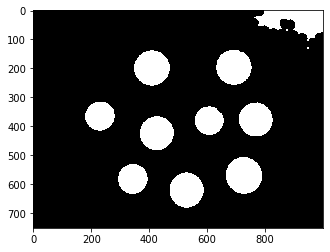

In [6]:
# show the closed image
plt.imshow(coin1_bb_o_closed, 'gray')

In [7]:
# Labeling features in the image
label_1, count_1 = measurements.label(coin1_bb_o_closed)

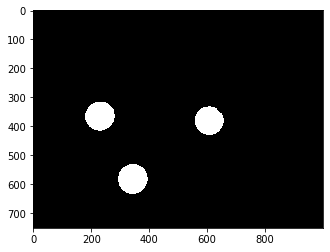

In [8]:
# find labels which containes coines
l4_1 = np.where(label_1 == 4, coin1_bb_o_closed, 0)  # 20
l5_1 = np.where(label_1 == 5, coin1_bb_o_closed, 0)  # 20
l6_1 = np.where(label_1 == 6, coin1_bb_o_closed, 0)  # 5
l7_1 = np.where(label_1 == 7, coin1_bb_o_closed, 0)  # 10
l8_1 = np.where(label_1 == 8, coin1_bb_o_closed, 0)  # 5
l9_1 = np.where(label_1 == 9, coin1_bb_o_closed, 0)  # 10
l10_1 = np.where(label_1 == 10, coin1_bb_o_closed, 0)  # 20
l11_1 = np.where(label_1 == 11, coin1_bb_o_closed, 0)  # 5
l12_1 = np.where(label_1 == 12, coin1_bb_o_closed, 0)  # 10
# making the binary mask for every group
mask_5 = np.bitwise_or(l6_1, l8_1)
mask_5_1 = np.bitwise_or(mask_5, l11_1)
mask_10 = np.bitwise_or(l7_1, l9_1)
mask_10_1 = np.bitwise_or(mask_10, l12_1)
mask_20 = np.bitwise_or(l4_1, l5_1)
mask_20_1 = np.bitwise_or(mask_20, l10_1)
# show mask to see the 5Ft coins
plt.imshow(mask_5_1, 'gray')

# Image with a binary mask (coin_1_1000x750.jpg)

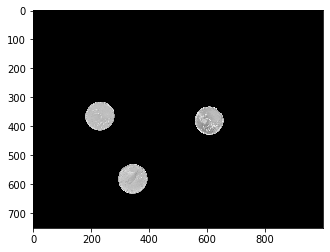

In [9]:
# show the masked coins (coin_1_1000x750.jpg)
# choose mask_5 if you want to see only the 5Ft coins on the image
#        mask_10 if you want to see only the 10Ft coins
#        mask_20 if you want to see only the 20Ft coins

mask = mask_5_1
coin1_masked = coin1_g * mask
plt.imshow(coin1_masked, 'gray')

# coin_0_1000x750.jpg

(array([1.0400e+02, 4.8000e+01, 1.0900e+02, 1.3500e+02, 2.9700e+02,
        2.9700e+02, 7.3900e+02, 7.1100e+02, 1.6510e+03, 1.8190e+03,
        3.7770e+03, 3.3030e+03, 5.5270e+03, 3.8820e+03, 5.6660e+03,
        3.6500e+03, 5.8460e+03, 4.6660e+03, 6.7060e+03, 4.0140e+03,
        6.1770e+03, 4.6430e+03, 7.0830e+03, 4.4210e+03, 4.0010e+03,
        5.8730e+03, 3.8170e+03, 5.3450e+03, 3.1720e+03, 3.8300e+03,
        2.0210e+03, 2.3500e+03, 1.2380e+03, 1.7450e+03, 9.4100e+02,
        1.3200e+03, 7.5600e+02, 1.1030e+03, 7.4000e+02, 1.1710e+03,
        7.7600e+02, 1.2860e+03, 9.2400e+02, 1.5000e+03, 1.2020e+03,
        2.1600e+03, 1.7420e+03, 3.4050e+03, 2.8770e+03, 3.3470e+03,
        6.3610e+03, 5.2810e+03, 1.0190e+04, 8.5750e+03, 1.6124e+04,
        1.3272e+04, 2.4773e+04, 2.0068e+04, 3.6496e+04, 2.8544e+04,
        4.8626e+04, 3.5758e+04, 5.7264e+04, 3.8870e+04, 5.6319e+04,
        3.4362e+04, 4.5333e+04, 2.5791e+04, 3.1582e+04, 1.7034e+04,
        1.9958e+04, 1.0016e+04, 1.0719e+04, 4.81

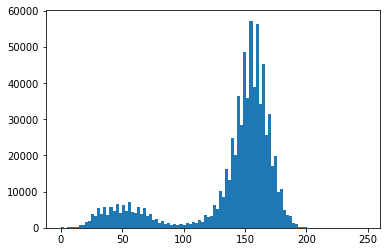

In [10]:
# loading the RGB image
coin0_rgb = Image.open('coin_0_1000x750.jpg')
# converting it to grayscale
coin0_g = np.array(coin0_rgb.convert('L'))

# checking out the histogram of the image, unique values of the image
# choosing a proper threshold (100)
# it's better to use the green intensities of the image
coin0_blue = np.array(coin0_rgb)[:,:,2]
plt.hist(coin0_blue.ravel(), 100)

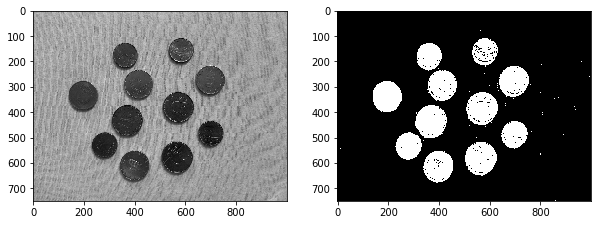

In [11]:
# getting back the image with removing the leftower parts
coin0_bb = coin0_blue < 100
# showing the binary image and the grayscale image 
fig, axes = plt.subplots(1, 2, figsize=np.array([10, 10]))
axes[0].imshow(coin0_blue, 'gray')
axes[1].imshow(coin0_bb, 'gray')

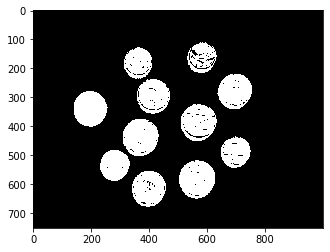

In [12]:
# creating structuring element
s_elem = np.ones([3, 3])
# remove small bright spots by creating the opened image
coin0_bb_opened = morphology.binary_opening(coin0_bb, footprint = s_elem)
s_elem = morphology.disk(7)
# remove small dark spots by creating the closed image
coin0_bb_o_closed = morphology.binary_closing(coin0_bb_opened, footprint = s_elem)
# show the opened image
plt.imshow(coin0_bb_opened, 'gray')

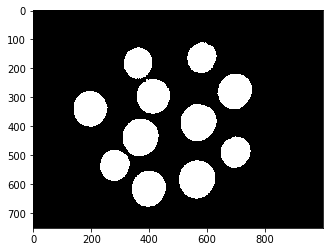

In [13]:
# show the closed image
plt.imshow(coin0_bb_o_closed, 'gray')

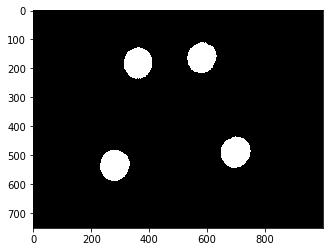

In [14]:
# Labeling features in the image
label_0, count_0 = measurements.label(coin0_bb_o_closed)
# find labels which containes coines
l1_0 = np.where(label_0 == 1, coin0_bb_o_closed, 0)  # 5
l2_0 = np.where(label_0 == 2, coin0_bb_o_closed, 0)  # 5
l3_0 = np.where(label_0 == 3, coin0_bb_o_closed, 0)  # 10
l4_0 = np.where(label_0 == 4, coin0_bb_o_closed, 0)  # 10
l5_0 = np.where(label_0 == 5, coin0_bb_o_closed, 0)  # 10
l6_0 = np.where(label_0 == 6, coin0_bb_o_closed, 0)  # 20
l7_0 = np.where(label_0 == 7, coin0_bb_o_closed, 0)  # 20
l8_0 = np.where(label_0 == 8, coin0_bb_o_closed, 0)  # 5
l9_0 = np.where(label_0 == 9, coin0_bb_o_closed, 0)  # 5
l10_0 = np.where(label_0 == 10, coin0_bb_o_closed, 0)  # 20
l11_0 = np.where(label_0 == 11, coin0_bb_o_closed, 0)  # 10
# making the binary mask for every group
mask = np.bitwise_or(l1_0, l2_0)
mask_5 = np.bitwise_or(l8_0, l9_0)
mask_5_0 = np.bitwise_or(mask_5, mask)
mask = np.bitwise_or(l3_0, l4_0)
mask_10 = np.bitwise_or(l5_0, l11_0)
mask_10_0 = np.bitwise_or(mask_10, mask)
mask_20 = np.bitwise_or(l6_0, l7_0)
mask_20_0 = np.bitwise_or(mask_20, l10_0)
# show mask to see the 5Ft coins
plt.imshow(mask_5_0, 'gray')

# Image with a binary mask (coin_0_1000x750.jpg)

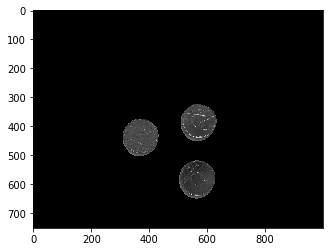

In [15]:
# show the masked coins (coin_0_1000x750.jpg)
# choose mask_5 if you want to see only the 5Ft coins on the image
#        mask_10 if you want to see only the 10Ft coins
#        mask_20 if you want to see only the 20Ft coins

mask = mask_20_0
coin1_masked = coin0_g * mask
plt.imshow(coin1_masked, 'gray')

# coin_2_1000x750.jpg

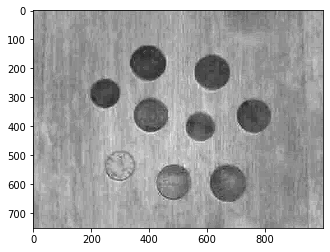

In [16]:
from skimage.color import rgb2lab, lab2rgb

# loading the RGB image
coin2_rgb = Image.open('coin_2_1000x750.jpg')
# converting it to grayscale
coin2_g = np.array(coin2_rgb.convert('L'))

# it's better to use the A channel of the LAB colorspace
coin2_a = rgb2lab(coin2_rgb)[:,:,1]
# showing the A channel of the LAB colorspace
plt.imshow(coin2_a, 'gray')

(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 2.0000e+00, 0.0000e+00,
        1.0000e+00, 5.0000e+00, 1.0000e+01, 7.0000e+00, 2.5000e+01,
        4.1000e+01, 1.9600e+02, 2.7600e+02, 3.8900e+02, 5.0400e+02,
        9.9300e+02, 1.0270e+03, 3.0530e+03, 2.8350e+03, 1.2880e+03,
        2.3130e+03, 5.9060e+03, 3.9720e+03, 5.8320e+03, 1.7130e+03,
        3.5800e+03, 3.5960e+03, 4.0210e+03, 5.0410e+03, 2.7840e+03,
        1.4010e+03, 3.1040e+03, 4.1640e+03, 4.8630e+03, 1.4950e+03,
        2.2630e+03, 1.0700e+03, 2.9930e+03, 3.1120e+03, 2.5620e+03,
        2.1630e+03, 1.4660e+03, 1.7600e+03, 2.2240e+03, 5.4740e+03,
        1.7553e+04, 7.2560e+03, 8.3700e+02, 8.6100e+02, 2.7003e+04,
        5.2432e+04, 6.5936e+04, 2.4713e+04, 8.3890e+03, 5.6090e+03,
        6.1566e+04, 4.9813e+04, 4.2411e+04, 8.3240e+03, 3.9980e+04,
        4.4363e+04, 4.8507e+04, 3.9722e+04, 1.6335e+04, 7.4910e+03,
        6.0210e+03, 1.5397e+04, 1.9497e+04, 1.80

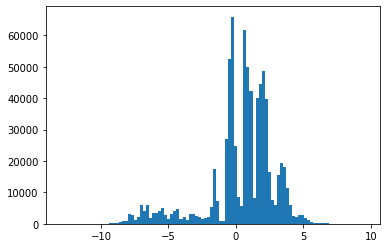

In [17]:
# checking out the histogram of the image, unique values of the image
# choosing a proper threshold
plt.hist(coin2_a.ravel(), 100)

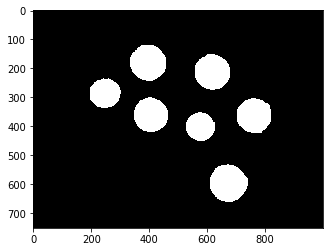

In [18]:
# getting back the image with removing the leftower parts
coin2_bb = coin2_a > -1
# creating structuring element
s_elem = np.ones([8, 8])
# remove small bright spots by creating the opened image
coin2_bb_opened = morphology.binary_opening(coin2_bb, footprint = s_elem)
s_elem = morphology.disk(12)
# remove small dark spots by creating the closed image
coin2_bb_o_closed_v1 = morphology.binary_closing(coin2_bb_opened, footprint = s_elem)
coin2_bb_o_closed_v1[0:100, 600:] = 1
coin2_bb_o_closed_v1[350:, 820:] = 1
coin2_bb_o_closed_v1[500:700, 400:580] = 1
coin2_bb_o_closed_v1[700:, 600:] = 1
coin2_bb_o_closed_v1 = 1 - coin2_bb_o_closed_v1 
# show the closed image
plt.imshow(coin2_bb_o_closed_v1, 'gray')

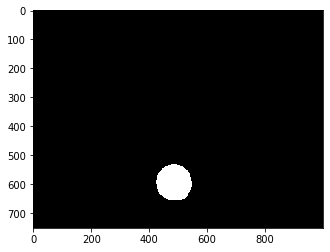

In [19]:
# getting back the image with removing the leftower parts
coin2_bb = coin2_a > 1
# creating structuring element
s_elem = np.ones([5, 5])
# remove small bright spots by creating the opened image
coin2_bb_opened = morphology.binary_opening(coin2_bb, footprint = s_elem)
s_elem = morphology.disk(20)
# remove small dark spots by creating the closed image
coin2_bb_o_closed_v2 = morphology.binary_closing(coin2_bb_opened, footprint = s_elem)
# removing extra elements
coin2_bb_o_closed_v2[0:500, :] = 1
coin2_bb_o_closed_v2[500:, 590:] = 1
coin2_bb_o_closed_v2[:, :50] = 1
coin2_bb_o_closed_v2[700:, :] = 1
# converting the image
coin2_bb_o_closed_v2 = 1 - coin2_bb_o_closed_v2 
# show the closed image
plt.imshow(coin2_bb_o_closed_v2, 'gray')

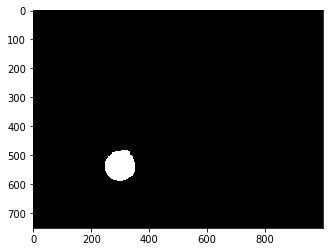

In [20]:
# removing extra elements
coin2_bb[:480,:] = 1
coin2_bb[:,:250] = 1
coin2_bb[:,390:] = 1
coin2_bb[590:,:] = 1
# creating structuring element
s_elem = np.ones([26, 26])
# remove small bright spots by creating the opened image
coin2_bb_opened = morphology.binary_opening(coin2_bb, footprint = s_elem)
s_elem = morphology.disk(10)
# remove small dark spots by creating the closed image
coin2_bb_o_closed_v3 = morphology.binary_closing(coin2_bb_opened, footprint = s_elem)
# converting the image
coin2_bb_o_closed_v3 = 1 - coin2_bb_o_closed_v3
# show the closed image
plt.imshow(coin2_bb_o_closed_v3, 'gray')

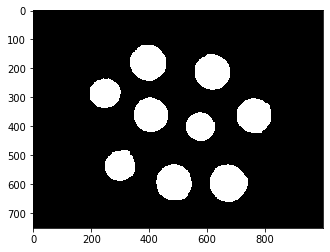

In [21]:
# connecting all the elements
coin2_bb_o_closed = np.bitwise_or(coin2_bb_o_closed_v1, coin2_bb_o_closed_v2)
coin2_bb_o_closed = np.bitwise_or(coin2_bb_o_closed, coin2_bb_o_closed_v3)
plt.imshow(coin2_bb_o_closed, 'gray')

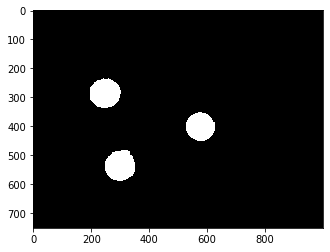

In [22]:
# Labeling features in the image
label_2, count_2 = measurements.label(coin2_bb_o_closed)
# find labels which containes coines
l1_2 = np.where(label_2 == 1, coin2_bb_o_closed, 0)  # 20
l2_2 = np.where(label_2 == 2, coin2_bb_o_closed, 0)  # 20
l3_2 = np.where(label_2 == 3, coin2_bb_o_closed, 0)  # 5
l4_2 = np.where(label_2 == 4, coin2_bb_o_closed, 0)  # 10
l5_2 = np.where(label_2 == 5, coin2_bb_o_closed, 0)  # 10
l6_2 = np.where(label_2 == 6, coin2_bb_o_closed, 0)  # 5
l7_2 = np.where(label_2 == 7, coin2_bb_o_closed, 0)  # 5
l8_2 = np.where(label_2 == 8, coin2_bb_o_closed, 0)  # 10
l9_2 = np.where(label_2 == 9, coin2_bb_o_closed, 0)  # 20
# making the binary mask for every group
mask_5 = np.bitwise_or(l3_2, l6_2)
mask_5_2 = np.bitwise_or(mask_5, l7_2)
mask_10 = np.bitwise_or(l4_2, l5_2)
mask_10_2 = np.bitwise_or(mask_10, l8_2)
mask_20 = np.bitwise_or(l1_2, l2_2)
mask_20_2 = np.bitwise_or(mask_20, l9_2)
# show mask to see the 5Ft coins
plt.imshow(mask_5_2, 'gray')

# Image with a binary mask (coin_2_1000x750.jpg)

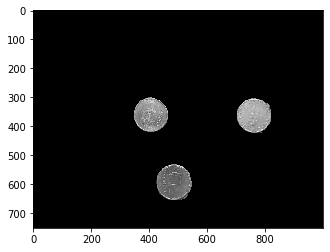

In [23]:
# show the masked coins (coin_2_1000x750.jpg)
# choose mask_5 if you want to see only the 5Ft coins on the image
#        mask_10 if you want to see only the 10Ft coins
#        mask_20 if you want to see only the 20Ft coins

mask = mask_10_2
coin2_masked = coin2_g * mask
plt.imshow(coin2_masked, 'gray')

In [24]:
coin5_sum = np.sum(l6_1 + l8_1 + l11_1
             + l1_0 + l2_0 + l8_0 
             + l9_0 + l3_2 + l6_2 
             + l7_2) / 10
coin10_sum = np.sum(l7_1 + l9_1 + l12_1 + l3_0 + l4_0 + l5_0 
             + l11_0 + l4_2 + l5_2 + l8_2) / 10
coin20_sum = np.sum(l4_1 + l5_1 + l10_1 + l6_0 + l7_0 + l10_0 
             + l1_2 + l2_2 + l9_2) / 9
print("All values (5Ft): \n" + str(np.sum(l6_1)) + ", " 
      + str(np.sum(l8_1)) + ", " + str(np.sum(l11_1)) + ", " + str(np.sum(l1_0)) + ", " 
      + str(np.sum(l2_0)) + ", " + str(np.sum(l8_0)) + ", " + str(np.sum(l9_0))  + ", "
      + str(np.sum(l3_2)) + ", " + str(np.sum(l6_2)) + ", " + str(np.sum(l7_2)))
print("Avg (5Ft): "+str(coin5_sum))
print("All values (10Ft): \n" + str(np.sum(l7_1)) + ", " 
      + str(np.sum(l9_1)) + ", " + str(np.sum(l12_1)) + ", " + str(np.sum(l3_0)) + ", " 
      + str(np.sum(l4_0)) + ", " + str(np.sum(l5_0)) + ", " + str(np.sum(l11_0))  + ", "
      + str(np.sum(l4_2)) + ", " + str(np.sum(l5_2)) + ", " + str(np.sum(l8_2)))
print("Avg (10Ft): "+str(coin10_sum))
print("All values (20Ft): \n" + str(np.sum(l4_1)) + ", " 
      + str(np.sum(l5_1)) + ", " + str(np.sum(l10_1)) + ", " + str(np.sum(l6_0)) + ", " 
      + str(np.sum(l7_0)) + ", " + str(np.sum(l10_0)) + ", " 
      + str(np.sum(l1_2)) + ", " + str(np.sum(l2_2)) + ", " + str(np.sum(l9_2)))
print("Avg (20Ft): "+str(coin20_sum))

All values (5Ft): 
7981, 7702, 8276, 8283, 8375, 8559, 8528, 8604, 7733, 8809
Avg (5Ft): 8285.0
All values (10Ft): 
10583, 10739, 11145, 11270, 10818, 11232, 11468, 10996, 11405, 12123
Avg (10Ft): 11177.9
All values (20Ft): 
11590, 11619, 12425, 12429, 12584, 12937, 12092, 11878, 13122
Avg (20Ft): 12297.333333333334


In [25]:
def get_mask(gray_image, binary_image, coin_value):
    """
    Returns image with a binary mask showing only the type of coin chosen for that run.
    
    Parameters:
    gray_image (numpy array): a grayscale image
    binary_image (numpy array): a binary image with highlighted coins
    coin_value (int): 5, 10 or 20
    
    Returns:
    numpy array: an image with a binary mask
    
    """
    # Checking the input value
    if coin_value != 5 and coin_value != 10 and coin_value != 20:
        print("Error! Invalid value. Possible values: 5, 10 and 20.")
        return 0
    # Labeling features in the image
    label, count = measurements.label(binary_image)
    # setting max and min values
    if coin_value == 5:
        max_value = 9000
        min_value = 7500
    elif coin_value == 10:
        max_value = 11500
        min_value = 10300
    elif coin_value == 20:
        max_value = 13300
        min_value = 11500
    # initializing a mask    
    mask = np.zeros(np.shape(binary_image), dtype=int)
    # searching for suitable areas
    for i in range(count + 1):
        l1 = np.where(label == i, binary_image, 0)
        if np.sum(l1) > min_value and np.sum(l1) < max_value:
            mask = np.bitwise_or(mask, l1)     
    if np.sum(mask) < 1:
        print("No " + str(coin_value) + "Ft coins")
        return 0
        
    return gray_image * mask

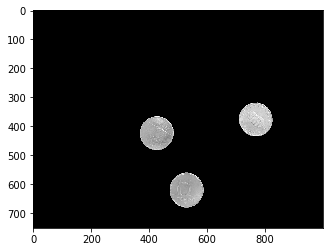

In [26]:
# coin0_g, coin1_g and coin2_g are RGB images
# coin0_bb_o_closed,coin1_bb_o_closed and coin2_bb_o_closed are grayscale images
img = get_mask(coin1_g, coin1_bb_o_closed, 10)
plt.imshow(img, 'gray')